In [135]:
%matplotlib inline

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [137]:
sns.set_theme(style="darkgrid", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.45, "grid.alpha":0.5}) 

In [ ]:
"""
To-Dos:

Learn about filters and find better heuristic than std dev or any other stat measure

Add comments and markdown cells to make this notebook readable

Add functions to port to python script

Create a script to automatically sort test readings from different regions using os module.

Automate this entire process.

"""

In [138]:
def set_df(df):
    df.index = pd.to_datetime(df.timestamp)
    df.drop(labels='timestamp',axis=1,inplace=True)

    for col in df:
        df[col] = df[col]-np.mean(df[col])
        df[col] = df[col]/np.std(df[col])
    return df

In [ ]:


df_sensor_one = pd.read_csv(r"E:\Projects\Vibration Sensing Touch Panel\data\region1_ten_taps\SENSOR0_data.csv")
df_sensor_two = pd.read_csv(r"E:\Projects\Vibration Sensing Touch Panel\data\region1_ten_taps\SENSOR1_data.csv")


df_sensor_one = set_df(df_sensor_one)
df_sensor_two = set_df(df_sensor_two)

std_dev_one = np.std(df_sensor_one['z'])
std_dev_two = np.std(df_sensor_two['z'])

df_sensor_two['taps'] = (~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))).apply(int)
df_sensor_one['taps'] = (~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))).apply(int)

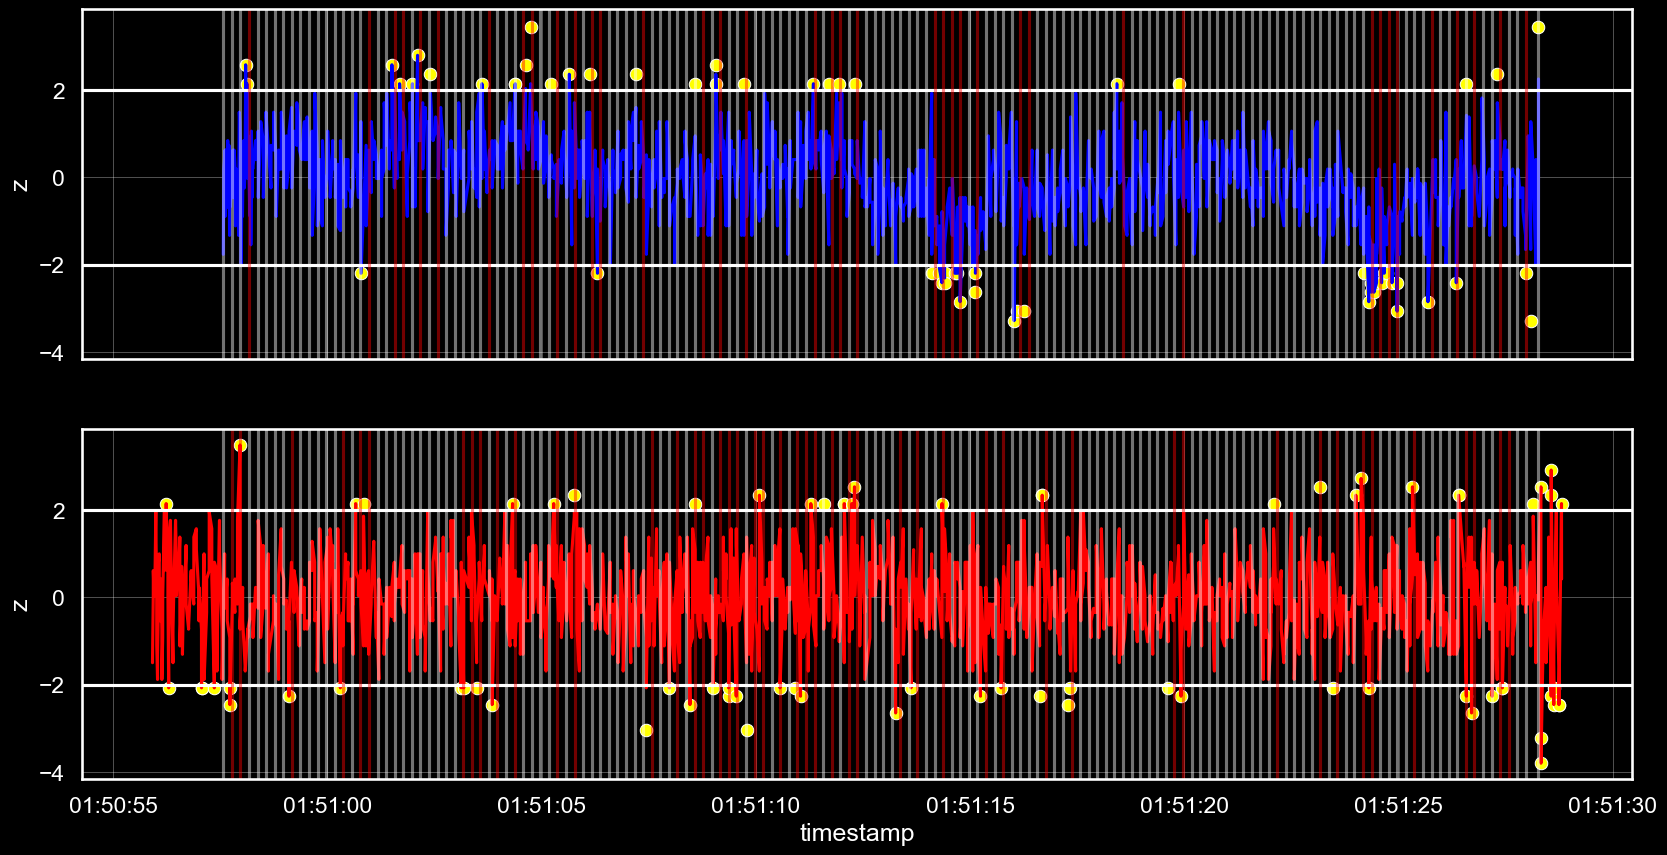

In [140]:
#checking if fixed window is the correct approach

fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])

ax[0].axhline(y = 2*std_dev_one)
ax[0].axhline(y = -2*std_dev_one)

ax[1].axhline(y = 2*std_dev_two)
ax[1].axhline(y = -2*std_dev_two)

df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


sns.scatterplot(x = df_new_two.index,y = df_new_two['z'],color="yellow",ax=ax[1])
sns.scatterplot(x = df_new_one.index,y = df_new_one['z'],color="yellow",ax=ax[0])

tap_dur = 0.2

time_diff = df_sensor_one.index[-1]-df_sensor_one.index[0]
time_diff //= (datetime.timedelta(seconds=tap_dur))

ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450)
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450)

last_time = df_sensor_one.index[0]

for x in range(1,time_diff):

    new_time = df_sensor_one.index[0] + datetime.timedelta(seconds=x*tap_dur)

    if(1 in df_sensor_one[last_time:new_time]['taps'].values):
        color = 'red'
    else:
        color = 'white'


    ax[0].axvline(x=new_time,alpha=0.450,color=color)
    last_time = new_time

last_time = df_sensor_one.index[0]

for x in range(1,time_diff):

    new_time = df_sensor_one.index[0] + datetime.timedelta(seconds=x*tap_dur)

    if(1 in df_sensor_two[last_time:new_time]['taps'].values):
        color = 'red'
    else:
        color = 'white'


    ax[1].axvline(x=new_time,alpha=0.450,color=color)
    last_time = new_time

ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450)
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450)

<Axes: xlabel='z', ylabel='Count'>

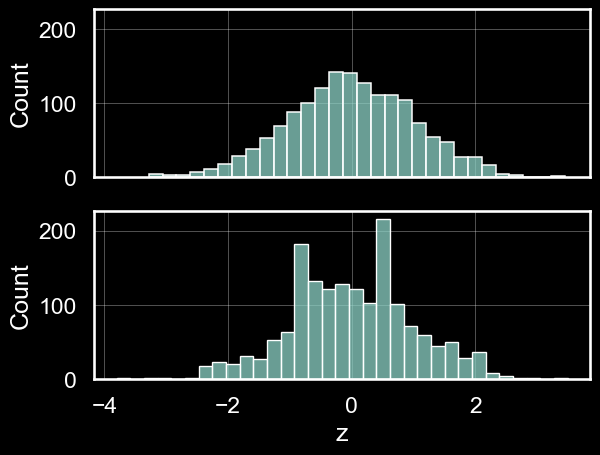

In [141]:
fig,ax = plt.subplots(2,sharex='all',sharey='all')
sns.histplot(df_sensor_one['z'],ax=ax[0])
sns.histplot(df_sensor_two['z'],ax=ax[1])

![Tap Detection Logic](/media/tap_detect.png)

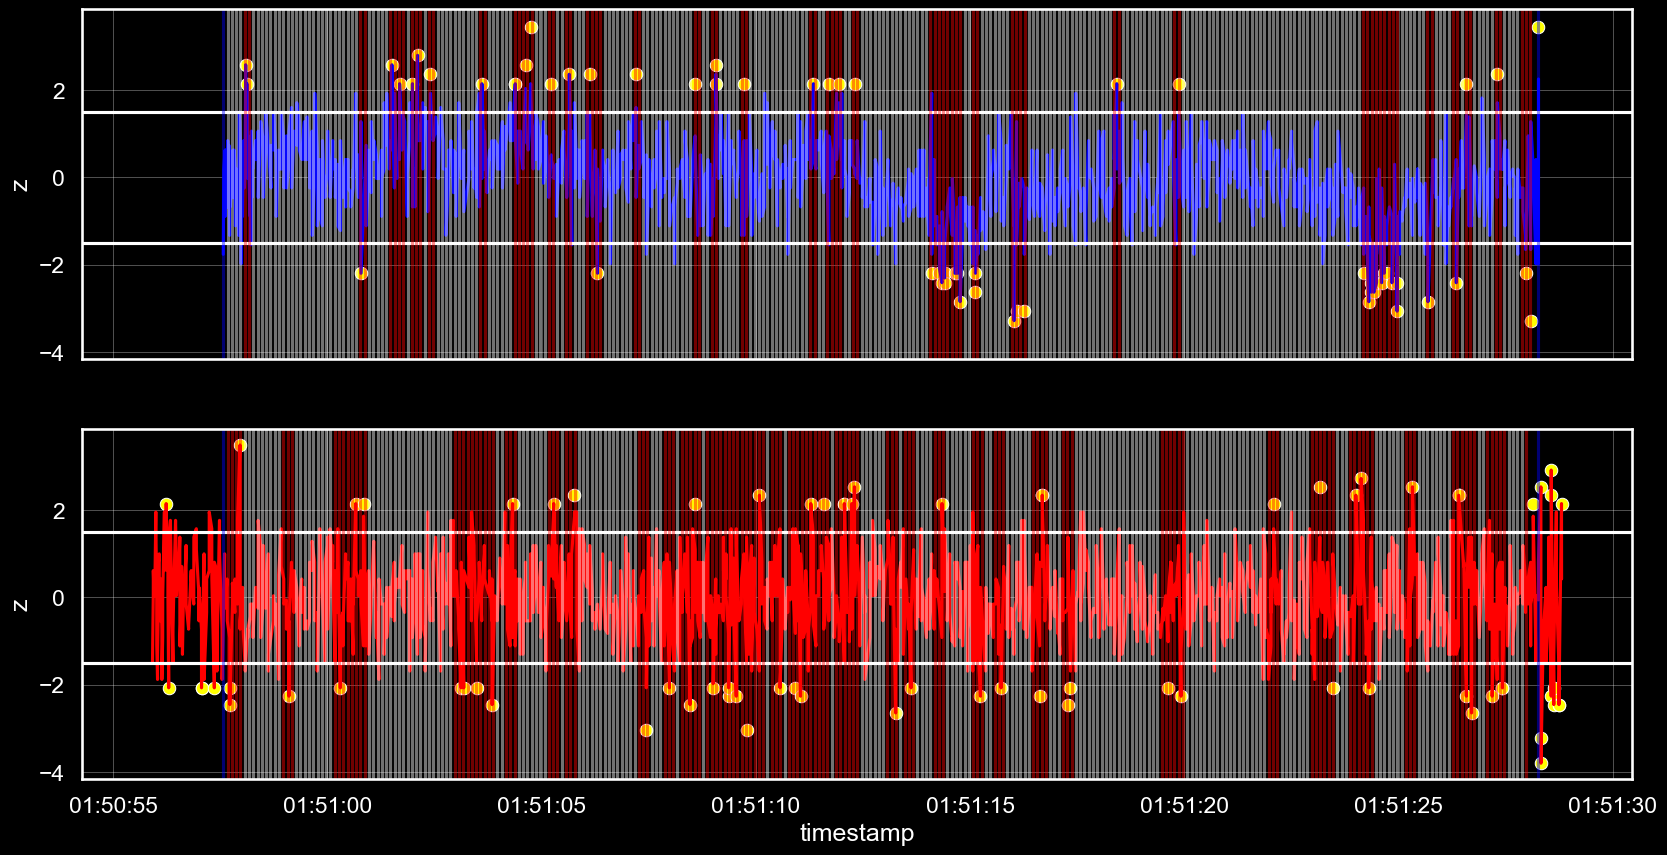

In [142]:
#comparing sliding window approach

window_size = 0.2
stride = 0.2*0.5



fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])

ax[0].axhline(y = 1.5*std_dev_one)
ax[0].axhline(y = -1.5*std_dev_one)

ax[1].axhline(y = 1.5*std_dev_two)
ax[1].axhline(y = -1.5*std_dev_two)

df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


sns.scatterplot(x = df_new_two.index,y = df_new_two['z'],color="yellow",ax=ax[1])
sns.scatterplot(x = df_new_one.index,y = df_new_one['z'],color="yellow",ax=ax[0])


ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')


old_time = df_sensor_one.index[0]
new_time = df_sensor_one.index[0]+datetime.timedelta(seconds=window_size)

sensor_one_taps = []

while new_time < df_sensor_one.index[-1]:

    window = df_sensor_one[old_time:new_time]['taps']
    if(1 in window.values):
        color = 'red'
        sensor_one_taps.append(old_time+datetime.timedelta(seconds=stride))

    else:
        color = 'white'
    
    ax[0].axvline(x=old_time+datetime.timedelta(seconds=stride),alpha=0.450,color=color)

    if(window.empty):
        break

    new_time += datetime.timedelta(seconds=stride)
    old_time += datetime.timedelta(seconds=stride)

old_time = df_sensor_one.index[0]
new_time = df_sensor_one.index[0]+datetime.timedelta(seconds=0.3)

sensor_two_taps = []

while new_time < df_sensor_one.index[-1]:

    window = df_sensor_two[old_time:new_time]['taps']

    if(1 in window.values):
        color = 'red'
        sensor_two_taps.append(old_time+datetime.timedelta(seconds=stride))

    else:
        color = 'white'
    
    ax[1].axvline(x=old_time+datetime.timedelta(seconds=stride),alpha=0.450,color=color)

    if(window.empty):
        break
    
    new_time += datetime.timedelta(seconds=stride)
    old_time += datetime.timedelta(seconds=stride)


ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
    

In [143]:
tap_intervals_sensor_one = []
tap_intervals_sensor_two = []

last_reading = sensor_one_taps[0]

for x in range(1,len(sensor_one_taps)):
    readings_diff = sensor_one_taps[x]-sensor_one_taps[x-1]
    if(readings_diff > datetime.timedelta(seconds=stride)):
        interval = [last_reading,sensor_one_taps[x-1]]
        last_reading = sensor_one_taps[x]

        tap_intervals_sensor_one.append(interval)

tap_intervals_sensor_one.append([last_reading, sensor_one_taps[-1]])

last_reading = sensor_two_taps[0]

for x in range(1,len(sensor_two_taps)):
    readings_diff = sensor_two_taps[x]-sensor_two_taps[x-1]
    if(readings_diff > datetime.timedelta(seconds=stride)):
        interval = [last_reading,sensor_two_taps[x-1]]
        last_reading = sensor_two_taps[x]

        tap_intervals_sensor_two.append(interval)

tap_intervals_sensor_two.append([last_reading, sensor_one_taps[-1]])

print(tap_intervals_sensor_two)

[[Timestamp('2025-06-06 01:50:57.670000'), Timestamp('2025-06-06 01:50:57.970000')], [Timestamp('2025-06-06 01:50:58.970000'), Timestamp('2025-06-06 01:50:59.170000')], [Timestamp('2025-06-06 01:51:00.170000'), Timestamp('2025-06-06 01:51:00.870000')], [Timestamp('2025-06-06 01:51:02.970000'), Timestamp('2025-06-06 01:51:03.870000')], [Timestamp('2025-06-06 01:51:04.170000'), Timestamp('2025-06-06 01:51:04.370000')], [Timestamp('2025-06-06 01:51:05.170000'), Timestamp('2025-06-06 01:51:05.370000')], [Timestamp('2025-06-06 01:51:05.570000'), Timestamp('2025-06-06 01:51:05.770000')], [Timestamp('2025-06-06 01:51:07.270000'), Timestamp('2025-06-06 01:51:07.470000')], [Timestamp('2025-06-06 01:51:07.870000'), Timestamp('2025-06-06 01:51:08.070000')], [Timestamp('2025-06-06 01:51:08.270000'), Timestamp('2025-06-06 01:51:08.670000')], [Timestamp('2025-06-06 01:51:08.870000'), Timestamp('2025-06-06 01:51:10.170000')], [Timestamp('2025-06-06 01:51:10.370000'), Timestamp('2025-06-06 01:51:10.57

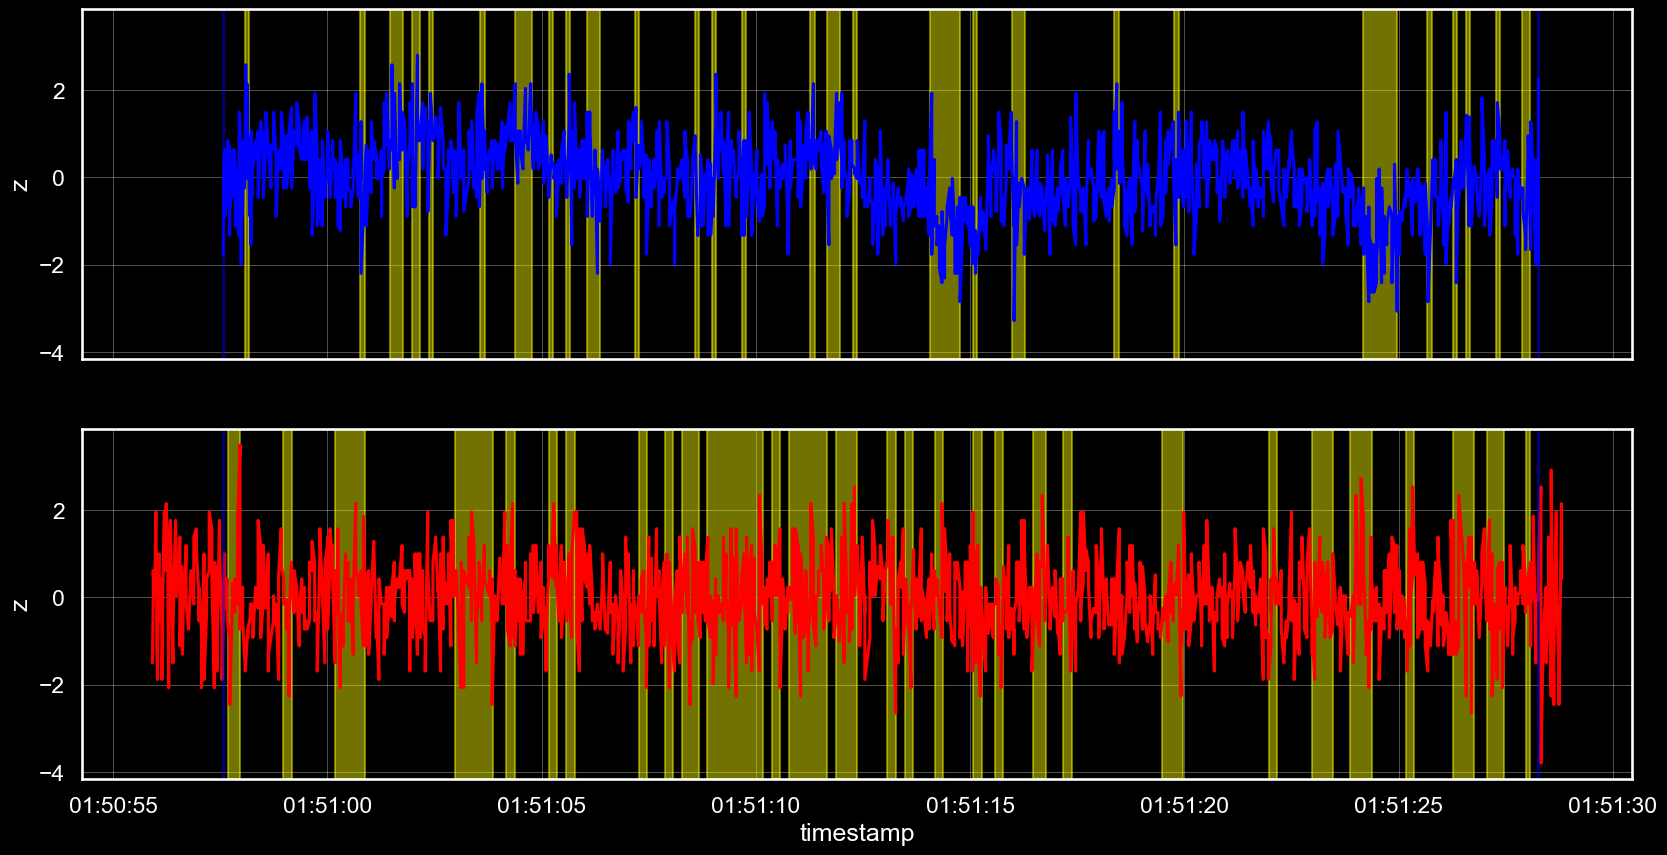

In [144]:
#plotting all intervals for tsfresh

window_size = 0.2
stride = 0.2*0.5



fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])


df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')


ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')

for interval in tap_intervals_sensor_one:
    ax[0].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)

for interval in tap_intervals_sensor_two:
    ax[1].axvspan(interval[0],interval[1],color='yellow',alpha=0.45)
    